# Generating Dummy Data Using Faker Library

In [50]:
!pip install faker

     ---------------------------------------- 1.8/1.8 MB 1.8 MB/s eta 0:00:00


In [53]:
from faker import Faker
import pandas as pd
import random

# Initializing Faker
fake = Faker()

# Number of records per product
num_records_per_product = 50

# Lists of variations
names = [
    'Apple - AirTag (4-Pack) - Silver', 
    'Apple - AirTag (2-Pack) - Silver',
    'Apple - AirTag (4-Pack) - Space Gray',
    'Jio - AirTag (4-Pack) - Black',
    'Jio - AirTag (2-Pack) - Black',
    'Jio - AirTag (4-Pack) - Blue'
]

best_in_tech_for_both = [
    'Best for tracking personal items with seamless integration with iOS.',
    'Top choice for efficient item tracking and secure connectivity.',
    'Advanced tracking capabilities with high accuracy and reliability.',
    'Affordable solution for everyday item tracking with good performance.',
    'Optimized for local network integration and budget-friendly features.',
    'Excellent for frequent travelers with global compatibility.'
]

practical_use_case = [
    'Tracking keys, wallets, and other personal items.',
    'Ideal for keeping tabs on luggage, pet collars, and more.',
    'Perfect for finding misplaced electronics and important belongings.',
    'Best for monitoring everyday items like wallets and backpacks.',
    'Useful for keeping track of packages and travel essentials.',
    'Great for locating frequently used household items and gadgets.'
]

# Generate dummy data
data = {
    'name': [],
    'price': [],
    'value_for_money': [],
    'year_of_launch': [],
    'total_number_of_people_in_use': [],
    'total_sales': [],
    'best_seller_in_which_country': [],
    'best_in_tech_for_both': [],
    'practical_use_case': []
}

# Apple AirTag data
for _ in range(num_records_per_product):
    data['name'].append(random.choice([name for name in names if 'Apple' in name]))
    data['price'].append(round(random.uniform(80, 120), 2))
    data['value_for_money'].append(random.choice(['High', 'Medium']))
    data['year_of_launch'].append(random.randint(2021, 2023))
    data['total_number_of_people_in_use'].append(random.randint(1000000, 5000000))
    data['total_sales'].append(random.randint(2000000, 10000000))
    data['best_seller_in_which_country'].append(random.choice(['USA', 'Canada', 'UK']))
    data['best_in_tech_for_both'].append(random.choice(best_in_tech_for_both))
    data['practical_use_case'].append(random.choice(practical_use_case))

# Jio AirTag data
for _ in range(num_records_per_product):
    data['name'].append(random.choice([name for name in names if 'Jio' in name]))
    data['price'].append(round(random.uniform(60, 100), 2))
    data['value_for_money'].append(random.choice(['Medium', 'Low']))
    data['year_of_launch'].append(random.randint(2022, 2023))
    data['total_number_of_people_in_use'].append(random.randint(500000, 2000000))
    data['total_sales'].append(random.randint(1000000, 5000000))
    data['best_seller_in_which_country'].append(random.choice(['India', 'Sri Lanka', 'Nepal']))
    data['best_in_tech_for_both'].append(random.choice(best_in_tech_for_both))
    data['practical_use_case'].append(random.choice(practical_use_case))

# Creating a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('automated_airtags_dataset.csv', index=False)

print("Automated dummy dataset with variations generated and saved to automated_airtags_dataset.csv")


Automated dummy dataset with variations generated and saved to automated_airtags_dataset.csv


In [2]:
import pandas as pd

# Loading the CSV file
df = pd.read_csv('automated_airtags_dataset.csv')

# Displaying the first few rows of the DataFrame
print(df.head())


                               name   price value_for_money  year_of_launch  \
0  Apple - AirTag (2-Pack) - Silver   90.96          Medium            2021   
1  Apple - AirTag (4-Pack) - Silver   99.11            High            2021   
2  Apple - AirTag (4-Pack) - Silver   86.14          Medium            2021   
3  Apple - AirTag (4-Pack) - Silver  113.69            High            2021   
4  Apple - AirTag (4-Pack) - Silver   90.51          Medium            2021   

   total_number_of_people_in_use  total_sales best_seller_in_which_country  \
0                        3327927      9257628                       Canada   
1                        1953857      9537779                           UK   
2                        2950117      6577276                          USA   
3                        3727373      6722463                           UK   
4                        4691687      4353910                       Canada   

                               best_in_tech_for_both  \


In [56]:
import os

# Check the current working directory
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")


Current working directory: C:\Users\ADMIN


In [57]:
# Check for duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicates)}")

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


# Finding The Accuracy of The Dummy Dataset Using ML

In [4]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['price', 'total_sales', 'total_number_of_people_in_use']])
anomalies = df[df['anomaly'] == -1]
print(anomalies)

"""One record has been flagged as an anomaly out of 100 records because :-
   Price: The anomalous record has a price of 118.07, which is close to the maximum price (119.53).
   Total Sales: The anomalous record has 8800424 total sales, which is also very high but within the range (1,018,110 to 9,985,361).
   Total Number of People in Use: This record has 4975383, which is the highest observed value.
   
   One reason can be taken into consideration that the the product of that record could be of a limited or seasonal edition""" 

G:\AnacondaJupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


                                name   price value_for_money  year_of_launch  \
31  Apple - AirTag (4-Pack) - Silver  118.07            High            2021   

    total_number_of_people_in_use  total_sales best_seller_in_which_country  \
31                        4975383      8800424                          USA   

                                best_in_tech_for_both  \
31  Advanced tracking capabilities with high accur...   

                                   practical_use_case  anomaly  
31  Ideal for keeping tabs on luggage, pet collars...       -1  


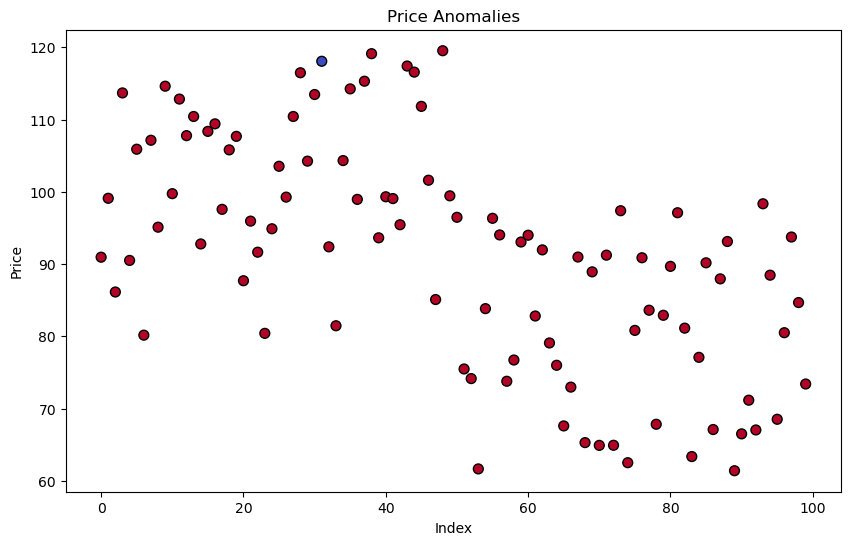

In [9]:
#Visualizing the anomaly as a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['price'], c=df['anomaly'], cmap='coolwarm', edgecolor='k', s=50)
plt.title('Price Anomalies')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()


In [10]:
# Isolation Forest model
features = df[['price', 'total_sales', 'total_number_of_people_in_use']]
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(features)

# Calculate the accuracy
num_normal = df[df['anomaly'] == 1].shape[0]
num_anomalies = df[df['anomaly'] == -1].shape[0]
total_records = df.shape[0]

accuracy_percentage = (num_normal / total_records) * 100

print(f"Normal records: {num_normal}")
print(f"Anomalous records: {num_anomalies}")
print(f"Accuracy of the dataset: {accuracy_percentage:.2f}%")


G:\AnacondaJupyter\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Normal records: 99
Anomalous records: 1
Accuracy of the dataset: 99.00%


# Data Visualizations to observe the trend

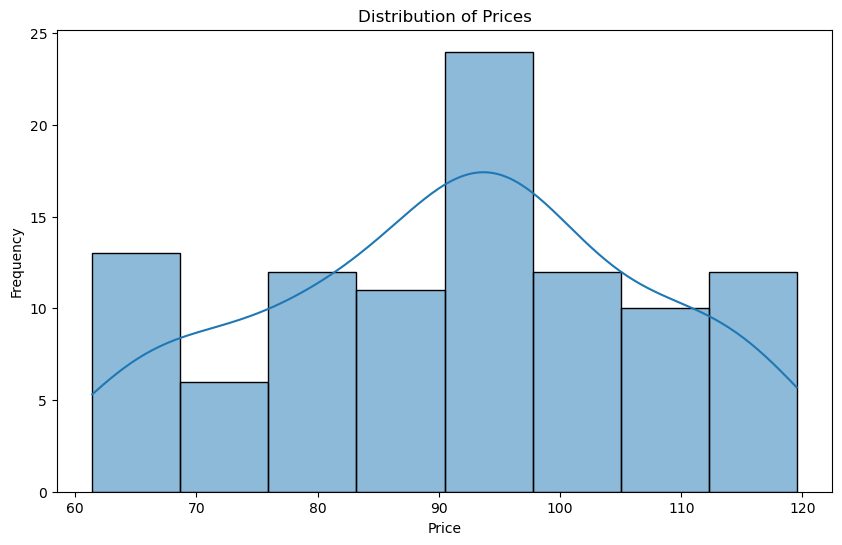

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

#Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


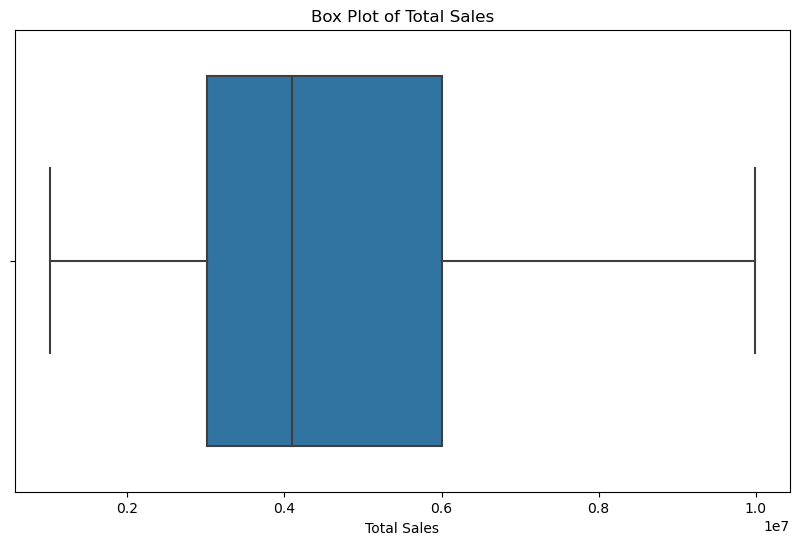

In [6]:
# Box Plot of Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_sales'])
plt.title('Box Plot of Total Sales')
plt.xlabel('Total Sales')
plt.show()

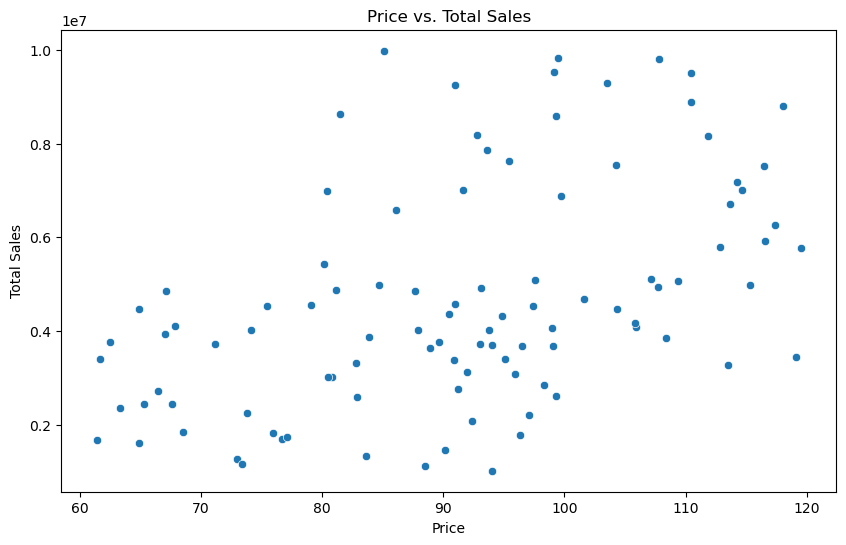

In [7]:
# Scatter Plot: Price vs. Total Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='total_sales', data=df)
plt.title('Price vs. Total Sales')
plt.xlabel('Price')
plt.ylabel('Total Sales')
plt.show()

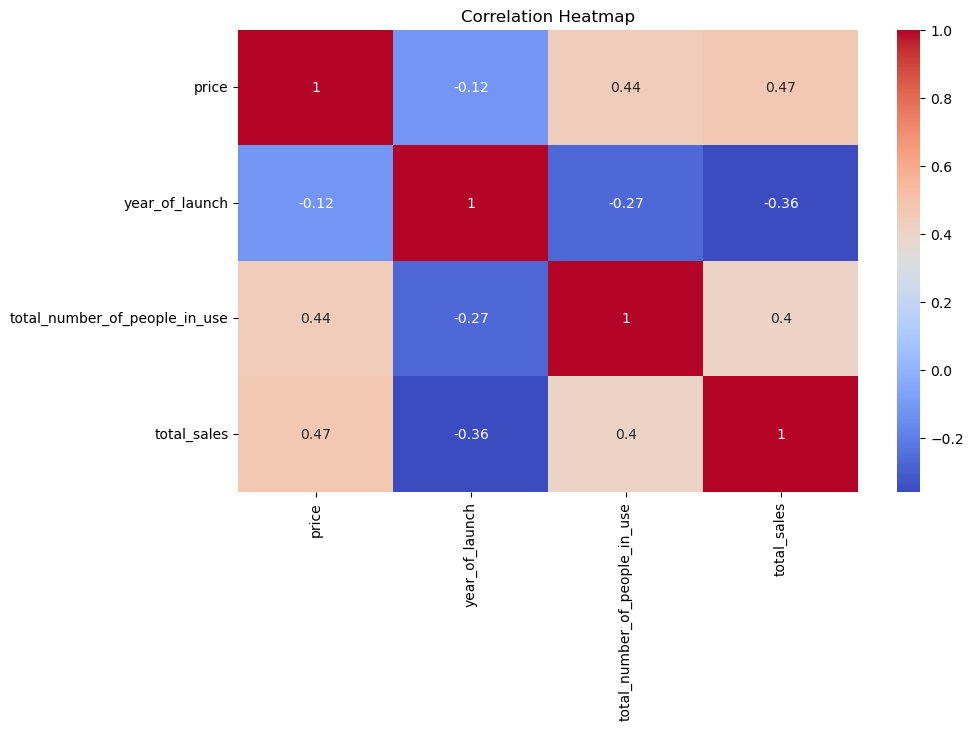

In [8]:
# Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

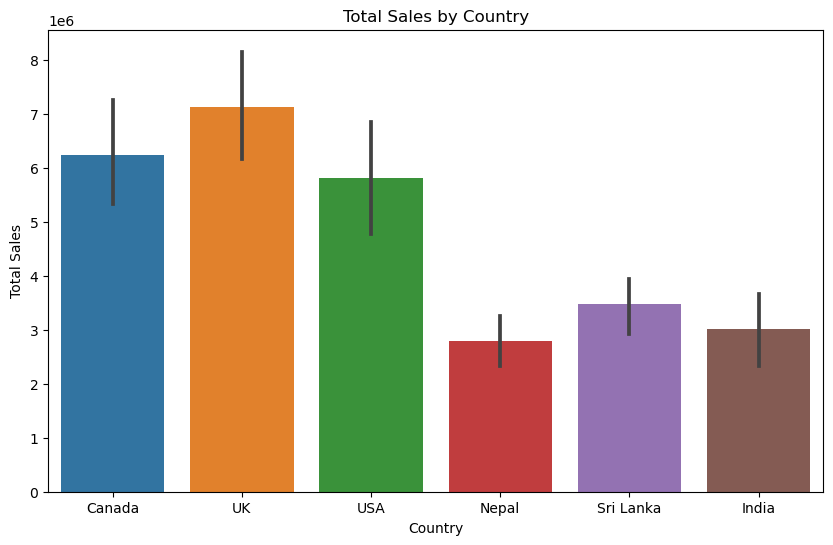

In [9]:
#bar plot to compare total sales by country
plt.figure(figsize=(10, 6))
sns.barplot(x='best_seller_in_which_country', y='total_sales', data=df)
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


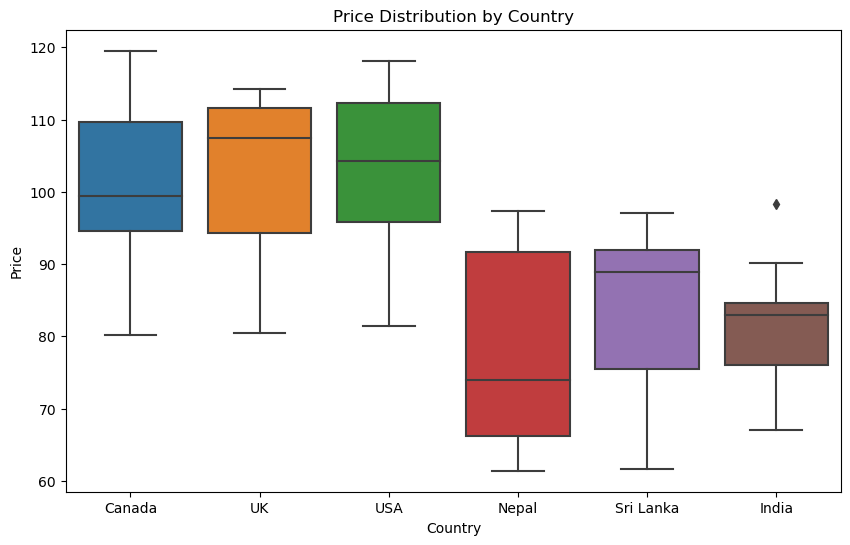

In [10]:
# box plot to Compare the price distribution across different models or countries.
plt.figure(figsize=(10, 6))
sns.boxplot(x='best_seller_in_which_country', y='price', data=df)
plt.title('Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()


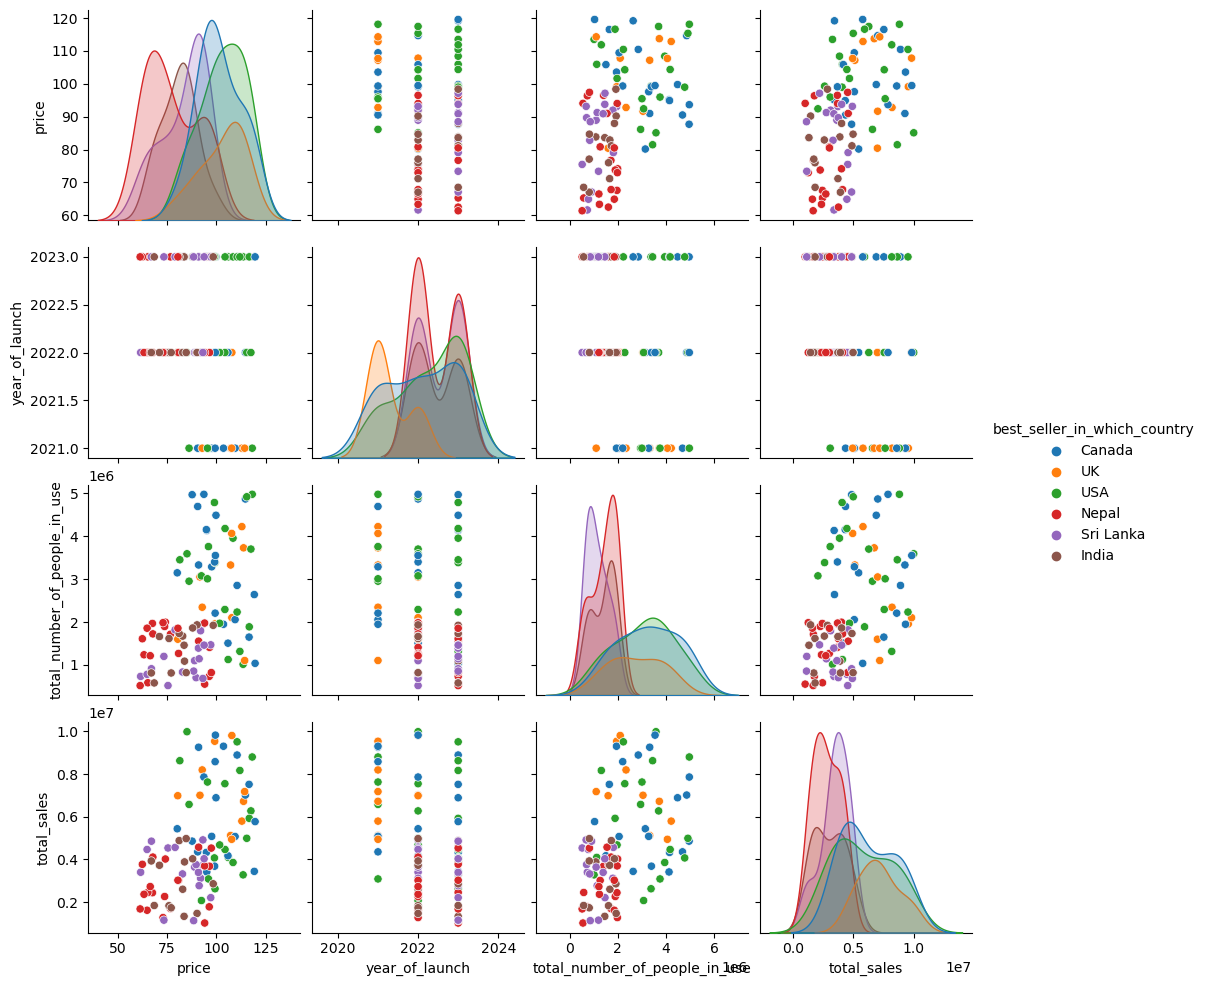

In [11]:
# pair plot to Explore relationships between multiple numerical variables.
sns.pairplot(df, hue='best_seller_in_which_country')
plt.show()

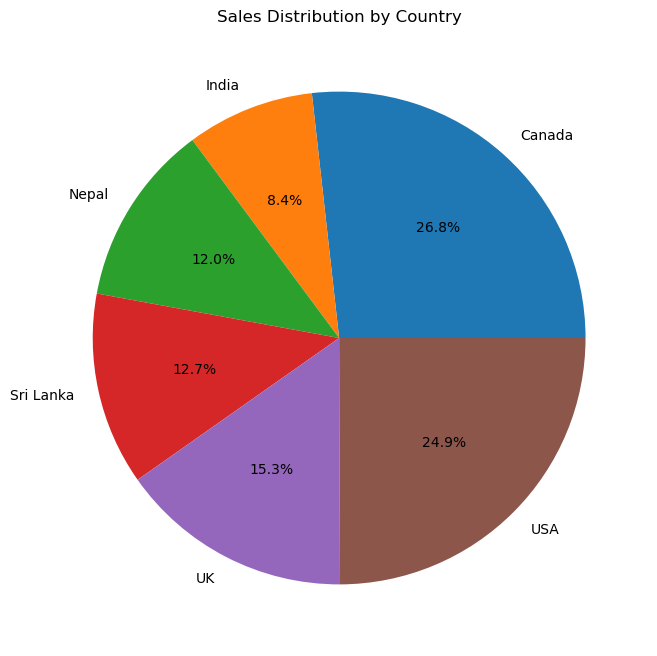

In [12]:
# pie chart to Display the proportion of total sales across different countries.
sales_by_country = df.groupby('best_seller_in_which_country')['total_sales'].sum()
plt.figure(figsize=(8, 8))
sales_by_country.plot.pie(autopct='%1.1f%%')
plt.title('Sales Distribution by Country')
plt.ylabel('')
plt.show()


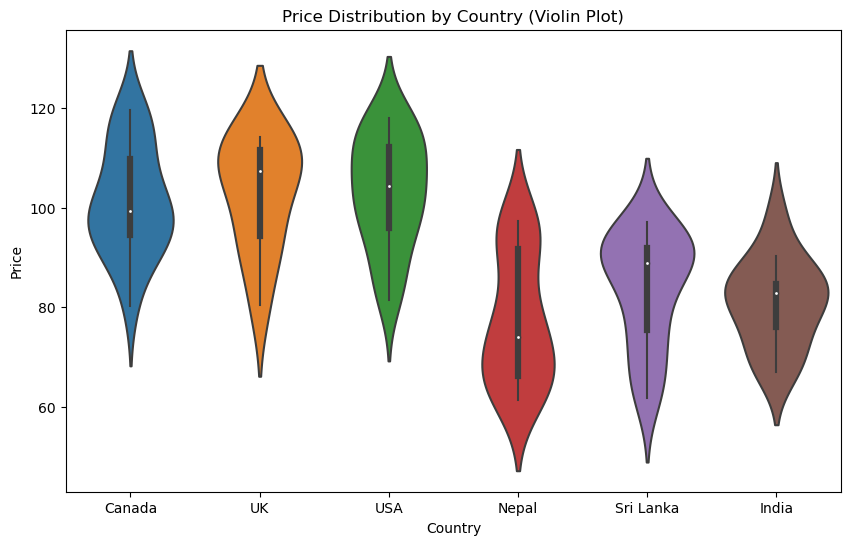

In [13]:
# Violin Plot to Compare price distributions across different countries or models.
plt.figure(figsize=(10, 6))
sns.violinplot(x='best_seller_in_which_country', y='price', data=df)
plt.title('Price Distribution by Country (Violin Plot)')
plt.xlabel('Country')
plt.ylabel('Price')
plt.show()


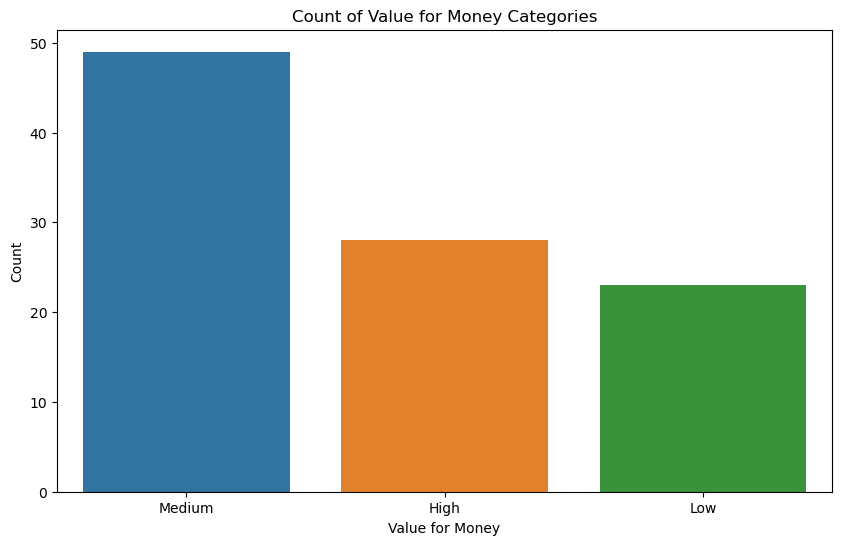

In [14]:
# Count plot to Display the count of different models or value-for-money categories.
plt.figure(figsize=(10, 6))
sns.countplot(x='value_for_money', data=df)
plt.title('Count of Value for Money Categories')
plt.xlabel('Value for Money')
plt.ylabel('Count')
plt.show()


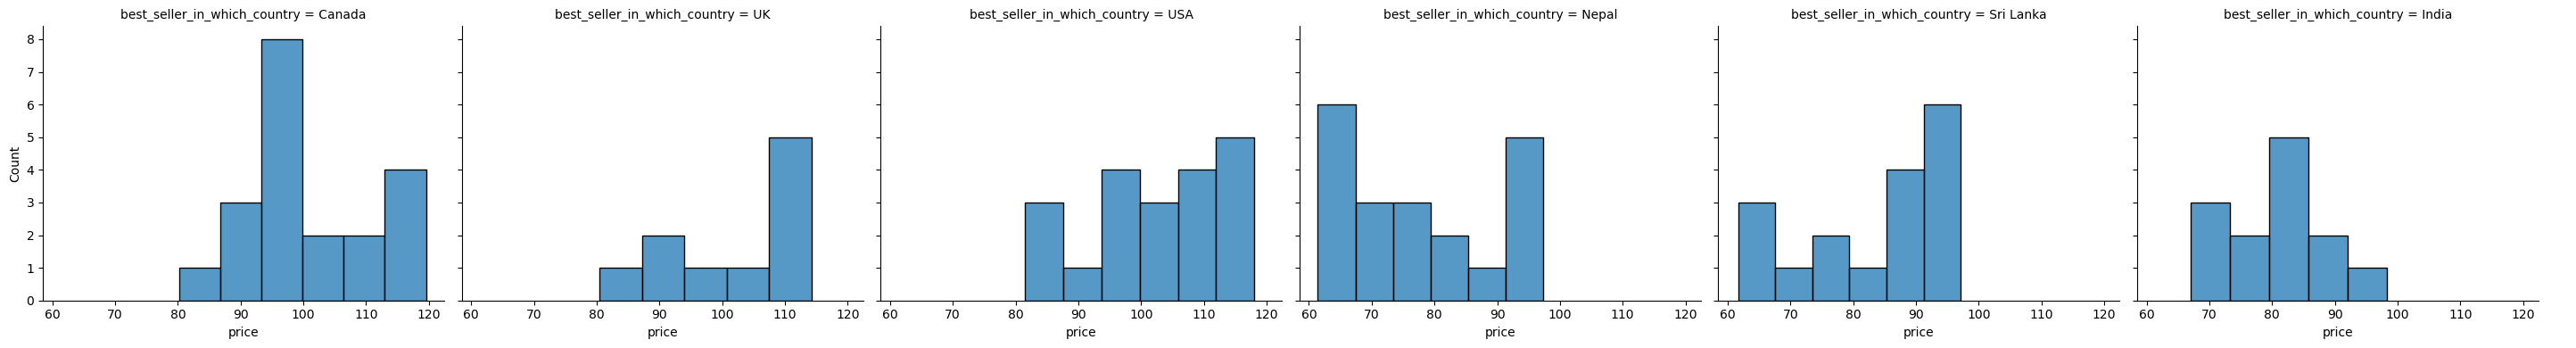

In [15]:
# facet grid to Show histograms of prices by country.
g = sns.FacetGrid(df, col='best_seller_in_which_country', height=4, aspect=1.2)
g.map(sns.histplot, 'price')
g.add_legend()
plt.show()


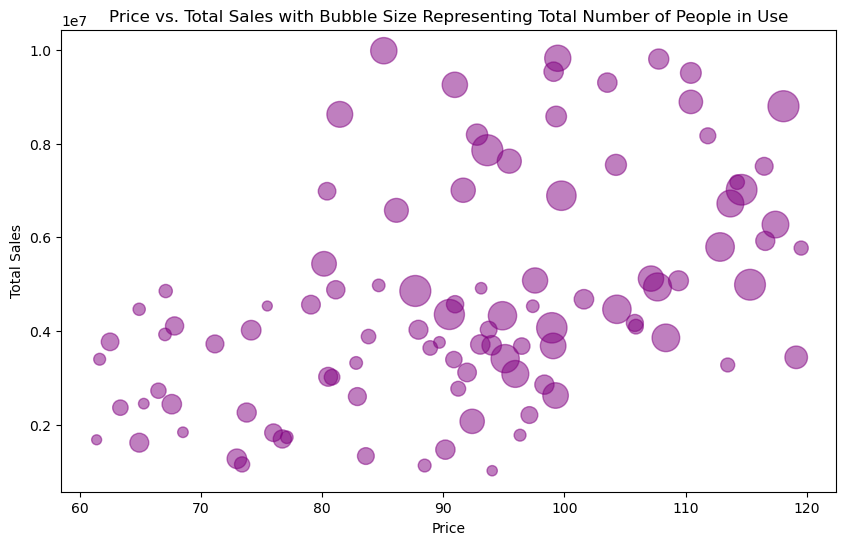

In [16]:
# Bubble Chart - Price vs. Total Sales with Total Number of People in Use as the bubble size
matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.scatter(df['price'], df['total_sales'], s=df['total_number_of_people_in_use'] / 10000, alpha=0.5, color='purple')

plt.title('Price vs. Total Sales with Bubble Size Representing Total Number of People in Use')
plt.xlabel('Price')
plt.ylabel('Total Sales')

plt.show()


In [18]:
!pip install squarify

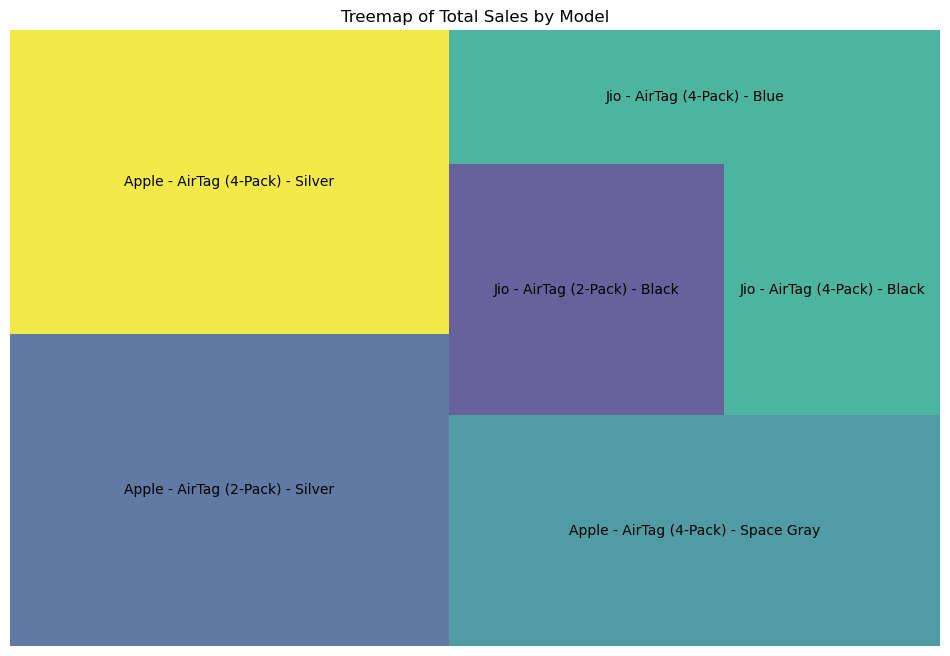

In [19]:
# Treemap - Total Sales by Model
import squarify

plt.figure(figsize=(12, 8))


sizes = df.groupby('name')['total_sales'].sum()
labels = df.groupby('name')['name'].first()

squarify.plot(sizes=sizes, label=labels, alpha=.8)
plt.title('Treemap of Total Sales by Model')
plt.axis('off')
plt.show()

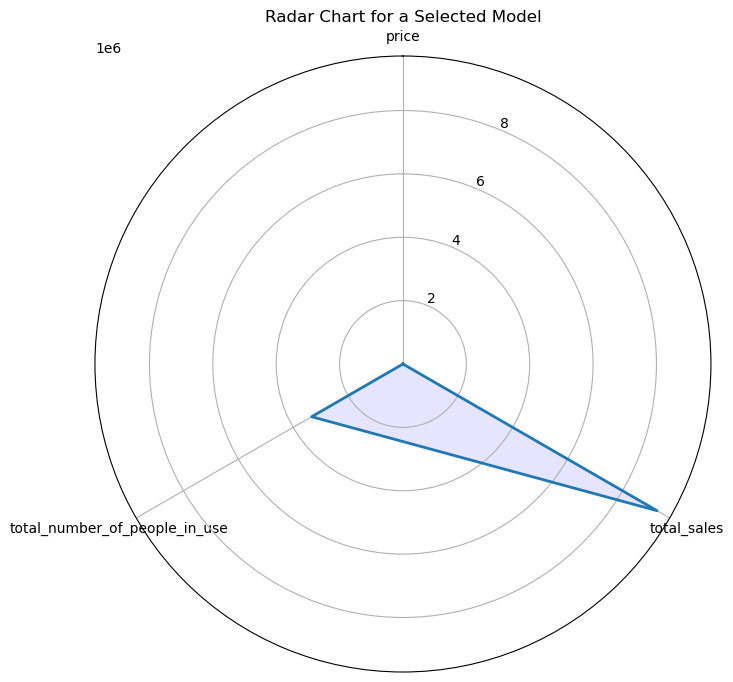

In [20]:
#Radar Chart
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example data for one model
categories = ['price', 'total_sales', 'total_number_of_people_in_use']
values = df.loc[0, ['price', 'total_sales', 'total_number_of_people_in_use']].values.flatten().tolist()

values += values[:1]  

angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
angles += angles[:1]

plt.figure(figsize=(8, 8))

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

plt.xticks(angles[:-1], categories)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Radar Chart for a Selected Model')
plt.show()


In [21]:
# Sunburst Chart - Best Seller in Which Country by Model
import plotly.express as px
fig = px.sunburst(df, path=['name', 'best_seller_in_which_country'], values='total_sales',
                  color='total_sales', hover_data=['total_sales'])

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()


In [23]:
!pip install wordcloud

     -------------------------------------- 300.6/300.6 kB 3.7 MB/s eta 0:00:00


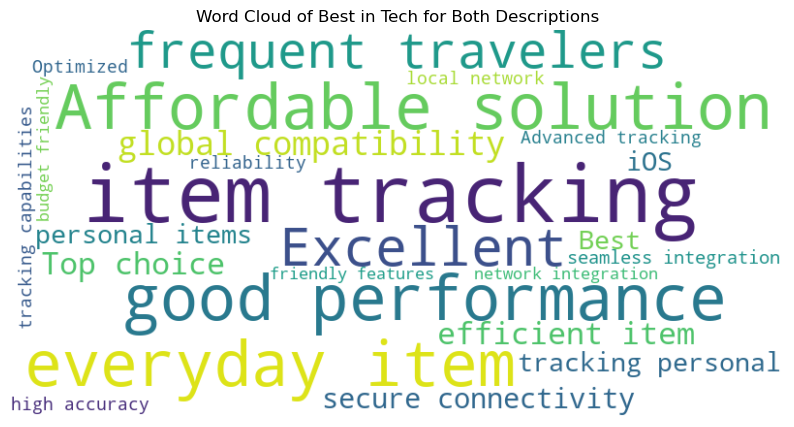

In [24]:
# Word Cloud - Best in Tech for Both
from wordcloud import WordCloud
text = " ".join(df['best_in_tech_for_both'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Best in Tech for Both Descriptions')
plt.show()

In [25]:
#Funnel chart
import plotly.graph_objects as go

stages = ['Initial Interest', 'Consideration', 'Purchase']
values = [10000, 7000, 4000]  # Example numbers, modify based on your dataset

fig = go.Figure(go.Funnel(
    y = stages,
    x = values,
    textinfo = "value+percent initial"
))

fig.update_layout(title='Sales Funnel Example')
fig.show()


#  Predicting the success of the product if it were made with raw materials available in India for a cheaper price.


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target variable
features = df[['price', 'value_for_money', 'total_number_of_people_in_use']]
target = df['total_sales']

# Convert categorical variables into numerical (if needed)
features = pd.get_dummies(features, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5102976531225.287
R-squared: 0.19798169152550882


In [27]:
# Simulating a price reduction (let's say 20% cheaper in India)
price_reduction_factor = 0.8
X_test_india = X_test.copy()
X_test_india['price'] = X_test_india['price'] * price_reduction_factor

# Predicting sales with the reduced price
y_pred_india = model.predict(X_test_india)

# Comparing the results
comparison_df = pd.DataFrame({
    'Original Price': X_test['price'],
    'Reduced Price (India)': X_test_india['price'],
    'Original Predicted Sales': y_pred,
    'Predicted Sales in India': y_pred_india
})

print(comparison_df.head())


    Original Price  Reduced Price (India)  Original Predicted Sales  \
83           63.37                 50.696              3.104680e+06   
53           61.66                 49.328              2.054674e+06   
70           64.92                 51.936              2.198069e+06   
45          111.83                 89.464              6.249381e+06   
44          116.57                 93.256              6.517560e+06   

    Predicted Sales in India  
83              2.568989e+06  
53              1.533439e+06  
70              1.649275e+06  
45              5.304040e+06  
44              5.532149e+06  


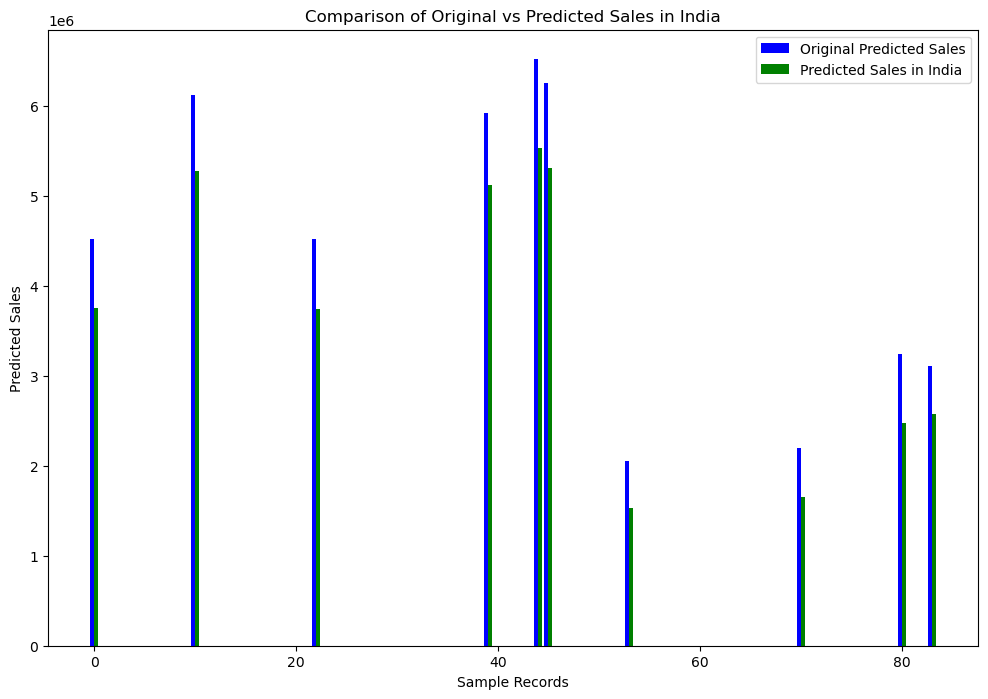

In [28]:
#Bar Chart: Comparison of Original vs. Predicted Sales
import matplotlib.pyplot as plt

# Sample data for visualization
comparison_sample = comparison_df.head(10)  # Taking a sample for visualization

plt.figure(figsize=(12, 8))


plt.bar(comparison_sample.index - 0.2, comparison_sample['Original Predicted Sales'], width=0.4, label='Original Predicted Sales', color='blue')
plt.bar(comparison_sample.index + 0.2, comparison_sample['Predicted Sales in India'], width=0.4, label='Predicted Sales in India', color='green')

plt.xlabel('Sample Records')
plt.ylabel('Predicted Sales')
plt.title('Comparison of Original vs Predicted Sales in India')
plt.legend()
plt.show()


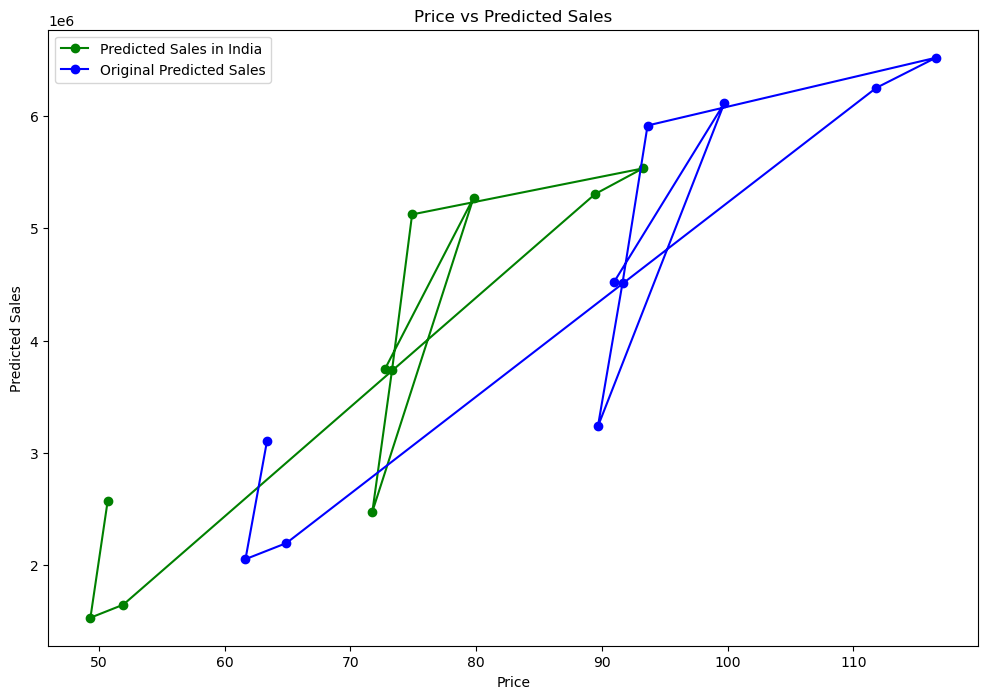

In [33]:
# Line Plot: Price vs. Predicted Sales
plt.figure(figsize=(12, 8))

plt.plot(comparison_sample['Reduced Price (India)'], comparison_sample['Predicted Sales in India'], marker='o', linestyle='-', color='green', label='Predicted Sales in India')
plt.plot(comparison_sample['Original Price'], comparison_sample['Original Predicted Sales'], marker='o', linestyle='-', color='blue', label='Original Predicted Sales')

plt.xlabel('Price')
plt.ylabel('Predicted Sales')
plt.title('Price vs Predicted Sales')
plt.legend()
plt.show()





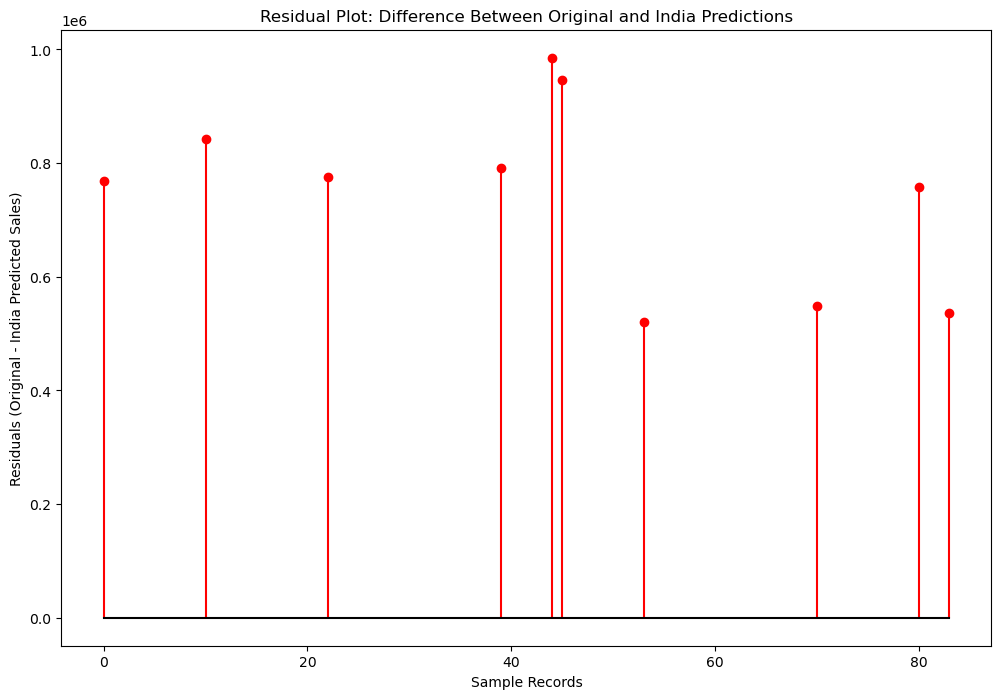

In [34]:
plt.figure(figsize=(12, 8))

# Residual plot (difference between predictions)
residuals = comparison_sample['Original Predicted Sales'] - comparison_sample['Predicted Sales in India']

plt.stem(comparison_sample.index, residuals, markerfmt='ro', linefmt='r-', basefmt='black')

plt.xlabel('Sample Records')
plt.ylabel('Residuals (Original - India Predicted Sales)')
plt.title('Residual Plot: Difference Between Original and India Predictions')
plt.show()
